# Import libraries

In [133]:
import pandas as pd
import numpy as np

# Import Functions

In [145]:
%run "dslabs_functions.py" #run notebook with functions made py the professor and that are going to be use in the project

In [146]:
filepath=r'dataset/2020-Apr.csv'
file_tag = 'dataset/2020-Apr.csv'

# Load File

### method 1 - random sample

In [93]:
test_data = True
# test_data = False

# Load the data
if test_data:
    df = pd.read_csv(filepath, na_values="")

    df: DataFrame = df.sample(frac=0.0015, replace = False)

else:
    # If not test_data, load the entire dataset
    df = pd.read_csv(filepath, parse_dates=['event_time'])


# Display the first 100 rows of the sample
print(df['event_type'].value_counts(normalize=True))

df.head(20)

event_type
view        0.936156
cart        0.049137
purchase    0.014707
Name: proportion, dtype: float64


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
55399466,2020-04-26 17:06:21 UTC,view,7600562,2232732103982711397,furniture.kitchen.table,beeline,34.47,627156817,69075d7f-f367-4c3b-b346-0c8ebf4ed14f
42793777,2020-04-22 03:05:56 UTC,view,100133124,2053013553945772349,electronics.audio.subwoofer,NaN,7.46,552323442,76e66ad1-9797-44aa-8d24-ebf81af4e835
26110137,2020-04-15 10:24:24 UTC,view,1004256,2232732093077520756,construction.tools.light,apple,926.64,515770552,df3e73c0-1408-4736-a78b-db15db303dc4
23281007,2020-04-14 05:15:37 UTC,view,4600457,2053013557385101831,appliances.kitchen.dishwasher,bosch,506.63,637978607,85fb63fc-3b7a-4bbf-b6eb-5a0a013b5284
39775552,2020-04-20 16:46:50 UTC,view,15100229,2232732107413652135,apparel.shorts,NaN,1010.58,522612286,fde26835-6568-452f-bb27-5e057735482f
54894273,2020-04-26 13:43:11 UTC,view,2800664,2232732091307524418,appliances.kitchen.refrigerators,NaN,396.75,605079237,d795539f-0508-4a5d-bacd-f1bc9b5ffee5
24947097,2020-04-14 19:38:31 UTC,view,3700937,2232732101063475749,appliances.environment.vacuum,karcher,303.71,512534021,fdc7d8bf-3a0b-4295-82c0-4cf91fe280cd
42298686,2020-04-21 17:46:44 UTC,view,1003711,2232732093077520756,construction.tools.light,samsung,592.04,514080912,ac87f596-9724-441d-b1f4-51f566bcc445
7518587,2020-04-05 16:32:13 UTC,view,1480776,2053013563835941749,appliances.kitchen.refrigerators,hp,906.07,594927146,529221f5-1fb4-4ece-ac43-fe0a7e7abab8
65597836,2020-04-30 14:37:00 UTC,view,1005284,2232732093077520756,construction.tools.light,samsung,2316.66,584899678,178a1951-c86f-4566-bc1e-d5c82621e4dd


### >> method 1.1 - random sample with undersample of the negative class (remove 30000 rows) [BEING USED]

In [147]:
import pandas as pd

# Define a flag for test data
test_data = True  # Altere para False se quiser carregar todo o dataset

# Load the data
if test_data:
    df = pd.read_csv(filepath, na_values="")
    df = df.sample(frac=0.0015, replace=False)
else:
    df = pd.read_csv(filepath, parse_dates=['event_time'])

# Exibir a contagem de classes antes do undersampling
print("Distribuição original:")
print(df['event_type'].value_counts(normalize=True))

# Separar as classes
df_not_purchase = df[df['event_type'] != 'purchase']
df_purchase = df[df['event_type'] == 'purchase']

# Verificar quantas linhas há na classe not_purchase
num_not_purchase = len(df_not_purchase)

# Definir o número de linhas a serem removidas
rows_to_remove = 30000

# Verificar se há linhas suficientes para remover
if num_not_purchase > rows_to_remove:
    # Remover 30.000 linhas da classe not_purchase
    df_not_purchase_downsampled = df_not_purchase.sample(n=num_not_purchase - rows_to_remove, random_state=42)
else:
    print(f"A classe 'not_purchase' só contém {num_not_purchase} linhas. Usando todas as linhas.")
    df_not_purchase_downsampled = df_not_purchase.copy()  # Manter todas as linhas

# Combinar a classe downsampled com a classe purchase
df_balanced = pd.concat([df_not_purchase_downsampled, df_purchase])

# Embaralhar o dataset combinado
df = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Exibir a nova distribuição de classes
print("Distribuição após undersampling:")
print(df['event_type'].value_counts(normalize=True))

# Exibir as primeiras 20 linhas do dataset equilibrado
print(df.head(20))
df.info



Distribuição original:
event_type
view        0.936967
cart        0.048606
purchase    0.014427
Name: proportion, dtype: float64
Distribuição após undersampling:
event_type
view        0.930657
cart        0.048724
purchase    0.020620
Name: proportion, dtype: float64
                 event_time event_type  product_id          category_id  \
0   2020-04-23 10:28:14 UTC       view    32400423  2232732115777094520   
1   2020-04-30 06:43:56 UTC       view   100010477  2232732099754852875   
2   2020-04-17 16:07:18 UTC       view     3900990  2053013557452210699   
3   2020-04-23 11:34:51 UTC       view    14300394  2232732108168626872   
4   2020-04-21 04:25:36 UTC       view   100091675  2232732097842250207   
5   2020-04-02 11:46:44 UTC       cart     1005169  2232732093077520756   
6   2020-04-23 14:26:58 UTC       view     1307555  2053013554658804075   
7   2020-04-16 13:08:30 UTC       view     2501213  2232732092565815652   
8   2020-04-15 12:18:47 UTC       view     1004939  223

<bound method DataFrame.info of                     event_time event_type  product_id          category_id  \
0      2020-04-23 10:28:14 UTC       view    32400423  2232732115777094520   
1      2020-04-30 06:43:56 UTC       view   100010477  2232732099754852875   
2      2020-04-17 16:07:18 UTC       view     3900990  2053013557452210699   
3      2020-04-23 11:34:51 UTC       view    14300394  2232732108168626872   
4      2020-04-21 04:25:36 UTC       view   100091675  2232732097842250207   
...                        ...        ...         ...                  ...   
69879  2020-04-10 06:42:48 UTC       view     1004838  2232732093077520756   
69880  2020-04-18 20:43:08 UTC       view     1005115  2232732093077520756   
69881  2020-04-26 04:19:31 UTC       view   100185025  2053013557695480347   
69882  2020-04-28 22:44:13 UTC       view    12201661  2053013553325015316   
69883  2020-04-11 10:54:57 UTC       view     3700580  2232732101063475749   

                               

### method 2 - random sample from each day of the dataset

In [50]:
import pandas as pd

# Assuming your date column is 'event_time' and the target is 'event_type'
test_data = True
# test_data = False

# Load the data
if test_data:
    df = pd.read_csv(filepath, na_values="")

    # Converting the time column to datetime, if necessary
    df['event_time'] = pd.to_datetime(df['event_time'])

    # Total number of rows you want in the final sample (1% of the total)
    total_samples = int(len(df) * 0.001)  # For example, 66,000 if the dataset has 66 million rows

    # Total count of rows per day
    daily_counts = df.groupby(df['event_time'].dt.date)['event_time'].count()

    # Function to perform balanced sampling per day
    def sample_per_day(group, frac, target_col='event_type'):
        # Split the group into 'purchase' and 'not purchase'
        purchase = group[group[target_col] == 'purchase']
        not_purchase = group[group[target_col] != 'purchase']

        # Calculate the number of samples based on the desired fraction per day
        total_samples_per_day = int(len(group) * frac)
        num_not_purchase = int(total_samples_per_day * 0.9)  # 90% of not purchases
        num_purchase = total_samples_per_day - num_not_purchase  # 10% of purchases

        # Sample each group
        sampled_not_purchase = not_purchase.sample(n=min(num_not_purchase, len(not_purchase)), replace=False)
        sampled_purchase = purchase.sample(n=min(num_purchase, len(purchase)), replace=False)

        # Return the combination of the two samples
        return pd.concat([sampled_not_purchase, sampled_purchase])

    # Determine the sampling fraction per day (based on the proportion of total desired samples)
    frac_per_day = total_samples / len(df)  # 1% of the total in the end

    # Apply the sampling function per day
    df = df.groupby(df['event_time'].dt.date).apply(sample_per_day, frac=frac_per_day).reset_index(drop=True)

else:
    # If not test_data, load the entire dataset
    df = pd.read_csv(filepath, parse_dates=['event_time'])

# Display the first 100 rows of the sample
print(df['event_type'].value_counts(normalize=True))
print(df.head(20))




event_type
view        0.861043
purchase    0.094341
cart        0.044615
Name: proportion, dtype: float64
                  event_time event_type  product_id          category_id  \
0  2020-04-01 09:38:45+00:00       view     1003316  2232732093077520756   
1  2020-04-01 15:00:06+00:00       view    15500102  2232732108319621820   
2  2020-04-01 12:01:58+00:00       view     1004856  2232732093077520756   
3  2020-04-01 08:14:06+00:00       view    22700592  2232732091643068746   
4  2020-04-01 07:38:10+00:00       view     1307352  2053013554658804075   
5  2020-04-01 14:40:30+00:00       view     1005160  2232732093077520756   
6  2020-04-01 14:25:33+00:00       view    28708366  2232732074815521775   
7  2020-04-01 06:35:20+00:00       view     4800898  2232732079706079299   
8  2020-04-01 13:33:05+00:00       view   100068493  2232732093077520756   
9  2020-04-01 14:12:01+00:00       cart     1004409  2232732093077520756   
10 2020-04-01 13:52:44+00:00       view     1801806  2232

### method 3 - joao

In [74]:
# Define a flag for test data
test_data = False

# Define a function to sample a fraction from each group
def sample_per_day(group, fraction=0.001):
    return group.sample(frac=fraction)

# Check if test data is enabled
if test_data:
    df = pd.read_csv(filepath)
    df['event_time'] = pd.to_datetime(df['event_time'], infer_datetime_format=True)

    # Apply the sampling to each group (grouped by event date) with 1% sample
    df = df.groupby(df['event_time'].dt.date).apply(lambda x: sample_per_day(x, 0.01)).reset_index(drop=True)


else:
    df = pd.read_csv(filepath)

    df['event_time'] = pd.to_datetime(df['event_time'], infer_datetime_format=True)

    # Apply the sampling to each group (grouped by event date) with 10% sample
    df = df.groupby(df['event_time'].dt.date).apply(lambda x: sample_per_day(x, 0.001)).reset_index(drop=True)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66591 entries, 0 to 66590
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   event_time     66591 non-null  datetime64[ns, UTC]
 1   event_type     66591 non-null  object             
 2   product_id     66591 non-null  int64              
 3   category_id    66591 non-null  int64              
 4   category_code  59845 non-null  object             
 5   brand          57702 non-null  object             
 6   price          66591 non-null  float64            
 7   user_id        66591 non-null  int64              
 8   user_session   66591 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 4.6+ MB


In [75]:

df['conversion'] = df['event_type'].apply(lambda x: 'purchase' if x == 'purchase' else 'not_purchase')

In [76]:
target = "conversion"

values = df[target].value_counts(normalize=True) 
print(values)

conversion
not_purchase    0.985794
purchase        0.014206
Name: proportion, dtype: float64


#### Sampling

In [77]:
# Separate the majority (0) and minority (1) classes
df_majority = df[df['conversion'] == 'not_purchase']
df_minority = df[df['conversion'] == 'purchase']

# Calculate the number of minority rows needed to make a 90/10 split
# Let total_rows be the total number of rows after undersampling
total_rows = len(df_majority) / 0.9  # 90% majority, 10% minority
desired_minority_count = int(total_rows * 0.1)  # 10% of the total should be minority

# Downsample the minority class to the desired number of rows
df_minority_downsampled = df_minority.sample(n=desired_minority_count, random_state=42)

# Combine the majority class with the downsampled minority class
df_imbalanced = pd.concat([df_majority, df_minority_downsampled])

# Shuffle the combined dataset
df = df_imbalanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new class distribution to verify the 90/10 split
print(df['conversion'].value_counts(normalize=True) * 100)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [78]:
# Separate the majority (0) and minority (1) classes
df_majority = df[df['conversion'] == 'not_purchase']
df_minority = df[df['conversion'] == 'purchase']

# Calculate the number of minority rows needed to make a 90/10 split
# Let total_rows be the total number of rows after undersampling
total_rows = len(df_majority) / 0.9  # 90% majority, 10% minority
desired_minority_count = int(total_rows * 0.1)  # 10% of the total should be minority

# Ensure that we do not request more samples than available in the minority class
desired_minority_count = min(desired_minority_count, len(df_minority))

# Downsample the minority class to the desired number of rows
df_minority_downsampled = df_minority.sample(n=desired_minority_count, random_state=42)

# Combine the majority class with the downsampled minority class
df_imbalanced = pd.concat([df_majority, df_minority_downsampled])

# Shuffle the combined dataset
df = df_imbalanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new class distribution to verify the 90/10 split
print(df['conversion'].value_counts(normalize=True) * 100)


conversion
not_purchase    98.579388
purchase         1.420612
Name: proportion, dtype: float64


In [87]:
# Define the fraction for sampling (1% of total data)
sample_fraction = 0.01

# Step 1: Ensure 'event_time' is in datetime format
df['event_time'] = pd.to_datetime(df['event_time'], infer_datetime_format=True)

# Step 2: Sample 1% of data per day to ensure all days are represented
def sample_per_day(group, sample_fraction=0.001):
    return group.sample(frac=sample_fraction, random_state=42)

df_sampled = df.groupby(df['event_time'].dt.date).apply(lambda x: sample_per_day(x, sample_fraction)).reset_index(drop=True)

# Step 3: Separate the majority (not_purchase) and minority (purchase) classes
df_majority = df_sampled[df_sampled['conversion'] == 'not_purchase']
df_minority = df_sampled[df_sampled['conversion'] == 'purchase']

# Step 4: Calculate the number of minority rows needed to achieve a 90/10 split
# Let total_rows be the total number of rows after undersampling
total_rows = len(df_majority) / 0.9  # 90% majority, 10% minority
desired_minority_count = int(total_rows * 0.1)  # 10% of the total should be minority

# Step 5: Ensure we do not request more samples than available in the minority class
desired_minority_count = min(desired_minority_count, len(df_minority))

# Step 6: Downsample the majority class to the desired number of rows
df_minority_downsampled = df_minority.sample(n=desired_minority_count, random_state=42)

# Step 7: Combine the majority class with the downsampled minority class
df_balanced = pd.concat([df_majority, df_minority_downsampled])

# Step 8: Shuffle the combined dataset
df = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new class distribution
print(df['conversion'].value_counts(normalize=True) * 100)


conversion
not_purchase    98.353293
purchase         1.646707
Name: proportion, dtype: float64


## Add columns based on dataset col

#### Data granularity

##### Split category_code column

In [148]:

# Create new columns based on the column category_based
df['category_code_lvl_1'] = df['category_code'].str.split(".").str[0] #Obter o 1º nivel do category code e criar nova coluna
df['category_code_lvl_2'] = df['category_code'].str.split(".").str[1] #Obter o 2º nivel do category code e criar nova coluna
df['category_code_lvl_3'] = df['category_code'].str.split(".").str[2] #Obter o 3º nivel do category code e criar nova coluna

#create column target based on the event_type column
#when event_type=purchase => purchase
#     event_type != purchase => not_purchase 

df['conversion'] = 'not_purchase'  # Definindo valor padrão
df.loc[df['event_type']=='purchase', 'conversion'] = 'purchase'

df.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,conversion
0,2020-04-23 10:28:14 UTC,view,32400423,2232732115777094520,apparel.underwear,NaN,26.26,645943394,457750f4-aaa0-48d8-90f8-d7535a3a5267,apparel,underwear,NaN,not_purchase
1,2020-04-30 06:43:56 UTC,view,100010477,2232732099754852875,appliances.personal.massager,xiaomi,386.08,571355671,e69c6126-6898-9349-9a36-3df9dae112a9,appliances,personal,massager,not_purchase
2,2020-04-17 16:07:18 UTC,view,3900990,2053013557452210699,electronics.clocks,ariston,123.53,564932435,097cb317-b0fd-4364-ba87-2d4a38820ed2,electronics,clocks,NaN,not_purchase
3,2020-04-23 11:34:51 UTC,view,14300394,2232732108168626872,apparel.underwear,kawai,1437.53,644812821,f9e1f3fa-6f50-4da0-8f90-d1dcb0cdee68,apparel,underwear,NaN,not_purchase
4,2020-04-21 04:25:36 UTC,view,100091675,2232732097842250207,apparel.shoes.keds,defacto,17.99,639741089,980cf47a-96cd-40e6-892e-4e77a709df8c,apparel,shoes,keds,not_purchase
5,2020-04-02 11:46:44 UTC,cart,1005169,2232732093077520756,construction.tools.light,samsung,195.87,517576602,b55feb25-3928-4a0f-bb04-c610b93df39a,construction,tools,light,not_purchase
6,2020-04-23 14:26:58 UTC,view,1307555,2053013554658804075,electronics.audio.headphone,asus,385.57,624313007,74eb0fcd-64c0-4ef8-ab34-06354045f1bd,electronics,audio,headphone,not_purchase
7,2020-04-16 13:08:30 UTC,view,2501213,2232732092565815652,appliances.kitchen.oven,galaxy,48.73,610691706,ffb35db2-74e2-4073-91be-b303adcd6de2,appliances,kitchen,oven,not_purchase
8,2020-04-15 12:18:47 UTC,view,1004939,2232732093077520756,construction.tools.light,vivo,141.55,572542867,a3cde335-78a3-400c-9f14-24d303d3d098,construction,tools,light,not_purchase
9,2020-04-28 08:18:29 UTC,view,100101801,2053013555724157349,sport.bicycle,redmond,21.85,648264194,b62c6611-8108-4699-b53f-8b5b690c2741,sport,bicycle,NaN,not_purchase


##### Split event_time column

In [149]:
# Split the event_time column to have more information and detail on the:
# - day_of_month
# - day_ok_week 
# - is_weekend
# - moment_of_day
# -hour
# - min
#As the dataset only as data from s sepecific month of 2020, we don't need to get the year, quarter and month.
#These attribute may influence the purchase of the users


# Converter a coluna 'event_time' para datetime
df['event_time'] = pd.to_datetime(df['event_time'], utc=True)

# Create new columns based on date column 'event_time'

df['week_of_month'] = df['event_time'].apply(lambda x: (x.day - 1) // 7 + 1)
df['is_weekend'] = df['event_time'].dt.weekday.apply(lambda x: "weekend" if x >= 5 else "weekday") 

df['day_of_week'] = df['event_time'].dt.day_name()# Monday=0, Sunday=6
df['day'] = df['event_time'].dt.day
df['hour'] = df['event_time'].dt.hour
df['min'] = df['event_time'].dt.minute

#create function to get time of the day
def get_time_of_day(hour):
    if 6<= hour <12:
        return "morning"
    elif 12<= hour <=18:
        return "afternoon"
    else:
        return "night"

df['time_of_day']= df['hour'].apply(get_time_of_day)
    
df.head()


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,conversion,week_of_month,is_weekend,day_of_week,day,hour,min,time_of_day
0,2020-04-23 10:28:14+00:00,view,32400423,2232732115777094520,apparel.underwear,NaN,26.26,645943394,457750f4-aaa0-48d8-90f8-d7535a3a5267,apparel,underwear,NaN,not_purchase,4,weekday,Thursday,23,10,28,morning
1,2020-04-30 06:43:56+00:00,view,100010477,2232732099754852875,appliances.personal.massager,xiaomi,386.08,571355671,e69c6126-6898-9349-9a36-3df9dae112a9,appliances,personal,massager,not_purchase,5,weekday,Thursday,30,6,43,morning
2,2020-04-17 16:07:18+00:00,view,3900990,2053013557452210699,electronics.clocks,ariston,123.53,564932435,097cb317-b0fd-4364-ba87-2d4a38820ed2,electronics,clocks,NaN,not_purchase,3,weekday,Friday,17,16,7,afternoon
3,2020-04-23 11:34:51+00:00,view,14300394,2232732108168626872,apparel.underwear,kawai,1437.53,644812821,f9e1f3fa-6f50-4da0-8f90-d1dcb0cdee68,apparel,underwear,NaN,not_purchase,4,weekday,Thursday,23,11,34,morning
4,2020-04-21 04:25:36+00:00,view,100091675,2232732097842250207,apparel.shoes.keds,defacto,17.99,639741089,980cf47a-96cd-40e6-892e-4e77a709df8c,apparel,shoes,keds,not_purchase,3,weekday,Tuesday,21,4,25,night


In [150]:
df.dtypes

event_time             datetime64[ns, UTC]
event_type                          object
product_id                           int64
category_id                          int64
category_code                       object
brand                               object
price                              float64
user_id                              int64
user_session                        object
category_code_lvl_1                 object
category_code_lvl_2                 object
category_code_lvl_3                 object
conversion                          object
week_of_month                        int64
is_weekend                          object
day_of_week                         object
day                                  int32
hour                                 int32
min                                  int32
time_of_day                         object
dtype: object

## Remove columns with ids

In [151]:
#drop id columns that are not relevant for the prediction of the class

df = df.drop(columns=['event_time','product_id', 'category_id', 'category_code','user_session','user_id'])

df.head(10)

,event_type,brand,price,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,conversion,week_of_month,is_weekend,day_of_week,day,hour,min,time_of_day
0,view,NaN,26.26,apparel,underwear,NaN,not_purchase,4,weekday,Thursday,23,10,28,morning
1,view,xiaomi,386.08,appliances,personal,massager,not_purchase,5,weekday,Thursday,30,6,43,morning
2,view,ariston,123.53,electronics,clocks,NaN,not_purchase,3,weekday,Friday,17,16,7,afternoon
3,view,kawai,1437.53,apparel,underwear,NaN,not_purchase,4,weekday,Thursday,23,11,34,morning
4,view,defacto,17.99,apparel,shoes,keds,not_purchase,3,weekday,Tuesday,21,4,25,night
5,cart,samsung,195.87,construction,tools,light,not_purchase,1,weekday,Thursday,2,11,46,morning
6,view,asus,385.57,electronics,audio,headphone,not_purchase,4,weekday,Thursday,23,14,26,afternoon
7,view,galaxy,48.73,appliances,kitchen,oven,not_purchase,3,weekday,Thursday,16,13,8,afternoon
8,view,vivo,141.55,construction,tools,light,not_purchase,3,weekday,Wednesday,15,12,18,afternoon
9,view,redmond,21.85,sport,bicycle,NaN,not_purchase,4,weekday,Tuesday,28,8,18,morning


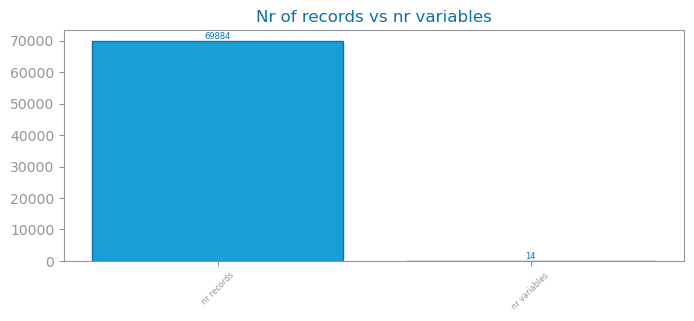

In [152]:
from matplotlib.pyplot import figure, savefig, show


figure(figsize=(8, 3)) #(largura,altura) 

values: dict[str, int] = {"nr records": df.shape[0], "nr variables": df.shape[1]}

#df_shape[0] - retorna o numero de linhas
#df_shape[1] - retorna o numero de colunas


plot_bar_chart(
    list(values.keys())\
    ,list(values.values())\
    ,title="Nr of records vs nr variables"
)
#savefig(f"images/{file_tag}_records_variables.png")
show()

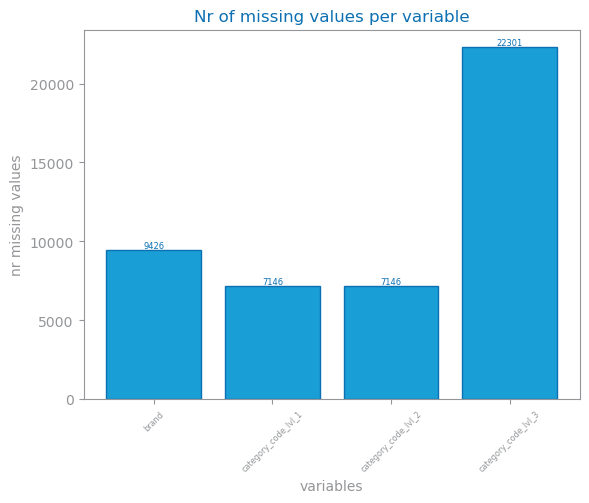

In [153]:

mv: dict[str, int] = {}
for var in df.columns:
    nr: int = df[var].isna().sum()

    if nr > 0:
        mv[var] = nr

figure()
plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
#savefig(f"images/{file_tag}_mv.png")
show()

conversion
not_purchase    68443
purchase         1441
Name: count, dtype: int64


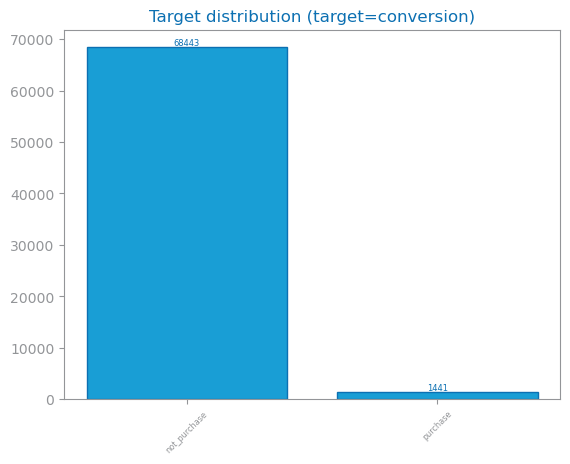

In [154]:
from matplotlib.pyplot import savefig, show
target = "conversion"

values: Series = df[target].value_counts()
print(values)

Figure(figsize=(4, 2))
plot_bar_chart(
    values.index.to_list(),
    values.to_list(),
    title=f"Target distribution (target={target})",
)
#savefig(f"images/{file_tag}_class_distribution.png")
show()

# Save final df from pre_processing phase into a csv file
- We will use this dataset for the next phase - data profiling

In [155]:
# Definir o caminho para salvar o arquivo CSV
filepath = r'dataset/df_ecom_pre_proc.csv'

# Salvar o DataFrame em CSV
df.to_csv(filepath, index=False)